In [16]:
##############################################################
# Authors: Malyaj Sirothia                                   #
# CWID:    **886687508**                                     #
# Due Date: 12 Mar 2021                                      #
##############################################################


#############################################################################################################################
# _____________PROJECT DESCRITPION_________________                                                                         #
#                                                                                                                           #
#    The file boston.npz contains a version of the Boston house-price dataset in NumPy .npz format.                         #
#    See http://lib.stat.cmu.edu/datasets/boston at the CMU StatLib Datasets Archive for a description of the data.         #
#                                                                                                                           #
#    1. Use the NumPy load() method to read the dataset. The data contains two arrays: 'features',                          #
#       which contains the variables CRIM through LSTAT, and 'target', which contains the variable MEDV.                    #
#    2. Set aside the first 102 items (20% of the total) as a test set, and the remaining 404 items for training.           #
#    3. Create a scatterplot of the training data showing the relationship between the                                      #
#       number of rooms and the median value of a home. Does the relationship appear to be linear?                          #
#    4. With RM as X and MEDV as t, use np.linalg.inv() to compute w for the training set.                                  #
#       What is the equation for MEDV as a linear function of RM?                                                           #
#    5. Use w to add a line representing the least squares fit to your scatter plot from experiment (3).                    #
#       How well does the model appear to fit the training set?                                                             #
#    6. Use w to find the predicted response for each value of the RM attribute in the training set,                        #
#       then compute the average loss 𝓛 for the model.                                                                      #
#    7. Repeat experiment (6) for the test set. How do the training and test MSE values compare?                            #
#       What accounts for the difference?                                                                                   #
#    8. Repeat experiments (4), (6), and (7) using all 13 input features as X. How do                                       #
#       the training and test MSEs for this model compare to the values you found for experiment (7)?                       #
#       What accounts for the difference?                                                                                   #
#    9. Using the value that you found for w for this new model, determine for each feature how much a one unit             #
#       increase in that feature would change the median value of a home. Based on the description of the dataset           #
#       provided by StatLib, convert your answer to dollars.                                                                #
#    10.Based on the amount of change in the value of a home, which features are most important?                            #
#                                                                                                                           #
#       This function should list the name and attendance statistics for any student whose attendance in any week falls     #
#       below the bottom fence for that week. Tardy students should be listed in the same                                   #
#       order as they appear in the original .csv file.                                                                     #
#############################################################################################################################


##############################################################
# ______________Working Condition_________________           #
#                                                            #
#       All the experiments are working.                     #
#       Please find the code in the below cell               #
##############################################################    

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#loading the file (Question 1)
dataset = np.load("./boston.npz")

#Splitting the data in 2 parts, training & validation(Question 2)
validationPart_Features = dataset['features'][:102]
validationPart_Target = dataset['target'][:102]
trainingPart_Features = dataset['features'][102:]
trainingPart_Target = dataset['target'][102:]


#storing values for variable RM (Average number of rooms) from 'features' file
rm = trainingPart_Features[:,5][:,None]

#storing value for the MEDV column from 'target' file
medv = trainingPart_Target[:,None]

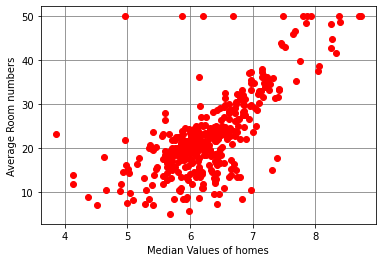

In [18]:
#plotting the data between Average number of rooms and median values (question 3)
plt.plot(rm, medv, 'ro')
plt.xlabel('Median Values of homes')
plt.ylabel('Average Room numbers')
plt.grid(axis='x', color='0.5')
plt.grid(axis='y', color='0.5')

In [4]:
#calculating value of W where rm is 'X' and medv is 't' (question 4)
X = np.hstack((np.ones_like(rm),rm))
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,medv)
weight = np.dot(invXX,Xt)
print('weights\n',weight)

#equation for MEDV as linear function of RM
print ('Equation ---->  ',weight[0],' + ',weight[1],'x')

weights
 [[-34.12731481]
 [  9.03591206]]
Equation ---->   [-34.12731481]  +  [9.03591206] x


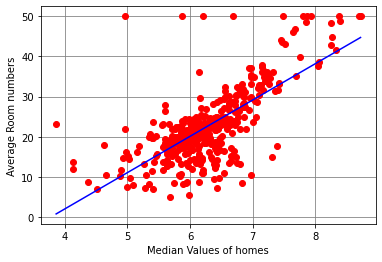

In [19]:
#adding a line to represent least square using weight calculated above (question 5)
testx = np.linspace(min(rm),max(rm),404)
testX = np.hstack((np.ones_like(testx),testx))
testt = np.dot(testX,weight)

#same code from question 3
plt.plot(rm, medv, 'ro')
plt.xlabel('Median Values of homes')
plt.ylabel('Average Room numbers')
plt.grid(axis='x', color='0.5')
plt.grid(axis='y', color='0.5')
plt.plot(testx,testt,'b')

In [7]:
#predicting the target value and computing the average loss (mean squared error) (question 6)
predictedTarget = np.dot(X, weight)
MSE_target = (1/predictedTarget.size)* np.dot((medv-predictedTarget).T, medv-predictedTarget)
print('Mean Squared Error (target) ----------> ', MSE_target)

Mean Squared Error (target) ---------->  [[41.05654883]]


In [20]:
#repeating the calculations in question 6 for the validation set to find the average loss (question 7)
medvValidation = validationPart_Target[:,None]
rmValidation = validationPart_Features[:,5][:,None]
X_valid = np.hstack((np.ones_like(rmValidation),rmValidation))
XX_valid = np.dot(X_valid.T,X_valid)
invXX_valid = np.linalg.inv(XX_valid)
Xt_valid = np.dot(X_valid.T,medvValidation)
weight_validation = np.dot(invXX_valid,Xt_valid)

target_validation = np.dot(X_valid, weight_validation)
MSE_validation = (1/target_validation.size)* np.dot((medvValidation-target_validation).T, medvValidation-target_validation)

print('Mean Squared Error (validation) ------> ',MSE_validation)
if (MSE_target < MSE_validation):
    print('\nLoss for target set is less than the loss for validation set')
else:
    print('\nLoss for validation set is less than the loss for target set')


Mean Squared Error (validation) ------>  [[53.30625795]]

Loss for target set is less than the loss for validation set


In [9]:
#repeating question 4, 6 and 7 for all 13 input features as 'X' (question 8)

X1 = np.hstack((np.ones_like(trainingPart_Features[:,0][:,None]), trainingPart_Features))

X1X1 = np.dot(X1.T,X1)
invX1X1 = np.linalg.inv(X1X1)
X1t = np.dot(X1.T,medv)
weightAll = np.dot(invX1X1,X1t)
print('weights\n',weightAll)


predictedTarget_all = np.dot(X1, weightAll)
MSE = (1/predictedTarget_all.size)* np.dot((medv-predictedTarget_all).T, medv-predictedTarget_all)
print('Mean Squared Error ---> ', MSE)


X1_valid = np.hstack((np.ones_like(validationPart_Features[:,0][:,None]), validationPart_Features))
X1X1_valid = np.dot(X1_valid.T,X1_valid)
invX1X1_valid = np.linalg.inv(X1X1_valid)
X1t_valid = np.dot(X1_valid.T,medvValidation)
weight1_validation = np.dot(invX1X1_valid,X1t_valid)

target1_validation = np.dot(X1_valid, weight1_validation)
MSE1_validation = (1/target1_validation.size)* np.dot((medvValidation-target1_validation).T, medvValidation-target1_validation)

print('MSE for all from validation ------>>  ',MSE1_validation)

weights
 [[ 3.19642409e+01]
 [-1.14552861e-01]
 [ 4.48932130e-02]
 [ 2.83755698e-02]
 [ 2.70909742e+00]
 [-1.67403672e+01]
 [ 4.11148209e+00]
 [-8.47905081e-04]
 [-1.38493905e+00]
 [ 3.21084569e-01]
 [-1.22497115e-02]
 [-9.12523500e-01]
 [ 1.02533638e-02]
 [-4.78414631e-01]]
Mean Squared Error --->  [[21.80719958]]
MSE for all from validation ------>>   [[20.21414888]]


In [21]:
#calulating the values (in dollar) by which the median value of price will change (question 9)
testW = weightAll * 1000
np.set_printoptions(suppress=True)

table = {'CRIM':float(testW[1])
         , 'ZN':float(testW[2])
         , 'INDUS':float(testW[3])
         , 'CHAS':float(testW[4])
         , 'NOX':float(testW[5])
         , 'RM':float(testW[6])
         , 'AGE':float(testW[7])
         , 'DIS':float(testW[8])
         , 'RAD':float(testW[9])
         , 'TAX':float(testW[10])
         , 'PTRATIO':float(testW[11])
         , 'B':float(testW[12])
         , 'LSTAT':float(testW[13])}

print ('Parameters                Value')
for parameter, values in table.items():
    print(f'{parameter:10}            ${values:5.2f}')

Parameters                Value
CRIM                  $-114.55
ZN                    $44.89
INDUS                 $28.38
CHAS                  $2709.10
NOX                   $-16740.37
RM                    $4111.48
AGE                   $-0.85
DIS                   $-1384.94
RAD                   $321.08
TAX                   $-12.25
PTRATIO               $-912.52
B                     $10.25
LSTAT                 $-478.41


In [11]:
# The most important feature which affect the price are as follows

# 1. Nitric oxides concentration (parts per 10 million) (NOX)
# 2. average number of rooms per dwelling (RM)
# 3. Charles River dummy variable (CHAS)
# 4. distances to five Boston employment centres (DIS)